# 1. Load the Data

In [21]:
# Import all required libraries

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set plot style
# sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [41]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv('Dataset.csv')
print(f"✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape}")
print(f"  Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

Loading dataset...
✓ Dataset loaded successfully!
  Shape: (567291, 17)
  Columns: ['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id', 'advertiser_id', 'order_id', 'line_item_type_id', 'os_id', 'integration_type_id', 'monetization_channel_id', 'ad_unit_id', 'total_impressions', 'total_revenue', 'viewable_impressions', 'measurable_impressions', 'revenue_share_percent']

First 5 rows:


,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [3]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info (column names and data types):")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

First 5 rows of the DataFrame:
                  date  site_id  ad_type_id  geo_id  device_category_id  \
0  2019-06-30 00:00:00      351          10     187                   2   
1  2019-06-30 00:00:00      351          10     187                   2   
2  2019-06-30 00:00:00      351          10     147                   2   
3  2019-06-30 00:00:00      351          10     147                   2   
4  2019-06-30 00:00:00      348          10     147                   3   

   advertiser_id  order_id  line_item_type_id  os_id  integration_type_id  \
0             84      3473                 19     60                    1   
1             84      3473                 19     58                    1   
2             84      3473                 19     60                    1   
3             84      3473                 19     58                    1   
4             79      3463                 20     59                    1   

   monetization_channel_id  ad_unit_id  total_impressio

In [23]:
# Data exploration
print("Dataset Information:")
print(f"  Total Records: {len(df):,}")
print(f"  Total Features: {df.shape[1]}")
print(f"  Missing Values: {df.isnull().sum().sum()}")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nBasic Statistics:")
df.describe()

Dataset Information:
  Total Records: 567,291
  Total Features: 17
  Missing Values: 0

Data Types:
date                        object
site_id                      int64
ad_type_id                   int64
geo_id                       int64
device_category_id           int64
advertiser_id                int64
order_id                     int64
line_item_type_id            int64
os_id                        int64
integration_type_id          int64
monetization_channel_id      int64
ad_unit_id                   int64
total_impressions            int64
total_revenue              float64
viewable_impressions         int64
measurable_impressions       int64
revenue_share_percent        int64
dtype: object

Basic Statistics:


,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


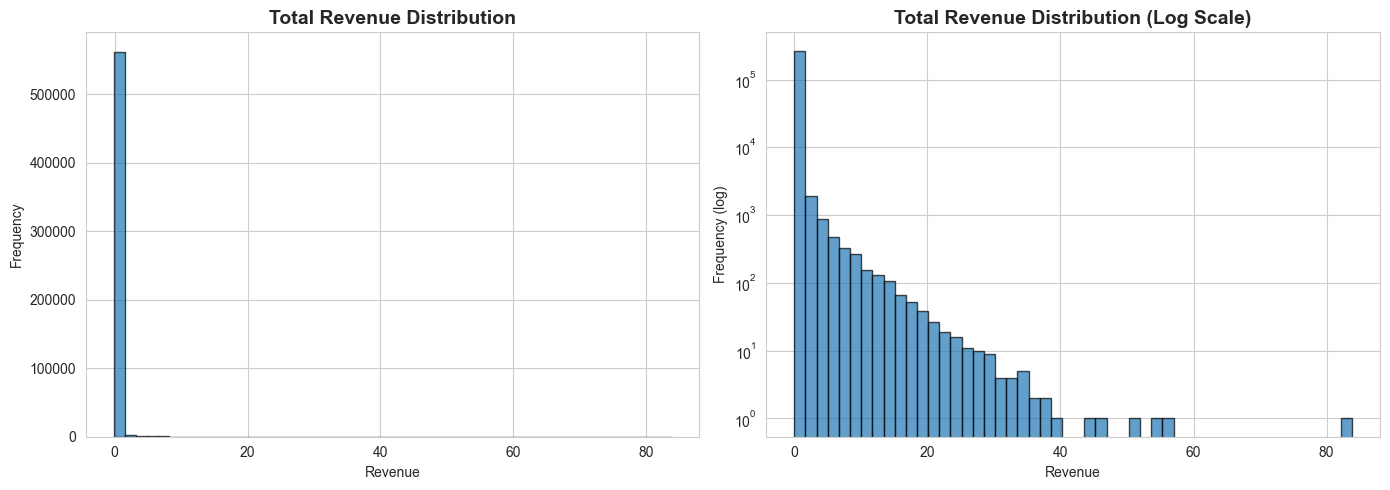

Revenue Statistics:
  Mean: $0.069740
  Median: $0.000000
  Max: $83.822000


In [24]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue distribution
axes[0].hist(df['total_revenue'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Total Revenue Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# Log scale for better visualization
axes[1].hist(df[df['total_revenue'] > 0]['total_revenue'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_yscale('log')
axes[1].set_title('Total Revenue Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Frequency (log)')

plt.tight_layout()
plt.show()

print(f"Revenue Statistics:")
print(f"  Mean: ${df['total_revenue'].mean():.6f}")
print(f"  Median: ${df['total_revenue'].median():.6f}")
print(f"  Max: ${df['total_revenue'].max():.6f}")

# 2. Visualize and Clean

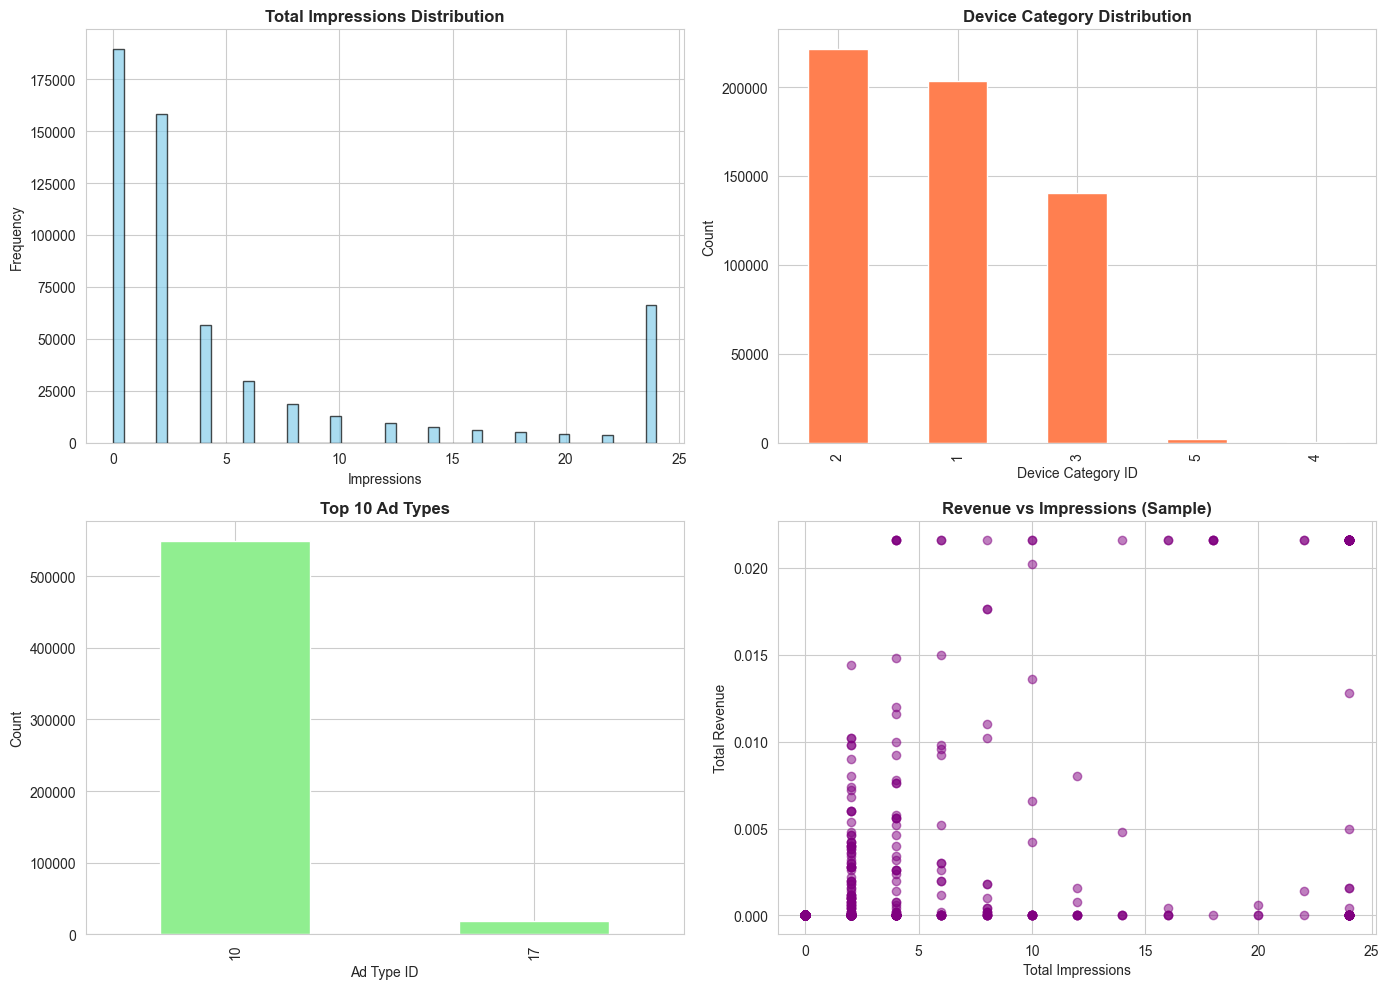

In [49]:
# Visualize key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total Impressions
axes[0, 0].hist(df['total_impressions'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Total Impressions Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Impressions')
axes[0, 0].set_ylabel('Frequency')

# Device Category
df['device_category_id'].value_counts().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Device Category Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Device Category ID')
axes[0, 1].set_ylabel('Count')

# Ad Type
df['ad_type_id'].value_counts().head(10).plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Top 10 Ad Types', fontweight='bold')
axes[1, 0].set_xlabel('Ad Type ID')
axes[1, 0].set_ylabel('Count')

# Revenue vs Impressions
axes[1, 1].scatter(df['total_impressions'][:1000], df['total_revenue'][:1000], alpha=0.5, color='purple')
axes[1, 1].set_title('Revenue vs Impressions (Sample)', fontweight='bold')
axes[1, 1].set_xlabel('Total Impressions')
axes[1, 1].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [50]:
# Data preprocessing
print("Preprocessing data...")
print("=" * 70)

# Convert date to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# Fill missing values
df['total_revenue'].fillna(0, inplace=True)

# Identify columns with no variance (not useful for prediction)
no_variance_cols = []
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].std() == 0:
        no_variance_cols.append(col)
        print(f"  ⚠️  Removing '{col}' (no variance: std = 0)")

# Identify ID columns (not directly related to revenue generation)
id_columns = ['order_id']  # Just identifiers, not predictive
print(f"  ⚠️  Removing ID columns: {id_columns}")

# Remove unnecessary columns
columns_to_remove = no_variance_cols + id_columns
df = df.drop(columns=columns_to_remove, errors='ignore')

# Handle outliers by CAPPING instead of removing records
print("\n--- Handling Outliers (Capping Method) ---")
print("  Note: Capping outliers instead of removing records to preserve data")

# Cap revenue outliers
Q1 = df['total_revenue'].quantile(0.25)
Q3 = df['total_revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

capped_revenue = df['total_revenue'].clip(lower=lower_bound, upper=upper_bound)
capped_count = (df['total_revenue'] != capped_revenue).sum()
df['total_revenue'] = capped_revenue
print(f"  Revenue outliers capped: {capped_count:,} values (kept all records)")

# Cap outliers for impression columns (only if they exist)
impression_cols = ['total_impressions', 'viewable_impressions', 'measurable_impressions']
for col in impression_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 3 * IQR
        
        capped_values = df[col].clip(upper=upper_bound)
        capped_count = (df[col] != capped_values).sum()
        df[col] = capped_values
        
        if capped_count > 0:
            print(f"  {col} outliers capped: {capped_count:,} values")

# Check for business biasedness
print("\n--- Checking Business Biasedness ---")
# Check temporal distribution
date_range = df['date'].dt.date
print(f"  Date range: {date_range.min()} to {date_range.max()}")
print(f"  Unique dates: {date_range.nunique()}")

# Check revenue by day of week
revenue_by_dow = df.groupby('day_of_week')['total_revenue'].mean()
print(f"  Revenue variance by day: {revenue_by_dow.std():.6f}")
if revenue_by_dow.std() > revenue_by_dow.mean() * 0.5:
    print(f"  ⚠️  High variance in daily revenue - consider day_of_week as important feature")

print("\n✓ Preprocessing completed!")
print(f"  Columns removed: {len(columns_to_remove)}")
print(f"  Features added: hour, day_of_week, is_weekend")
print(f"  Final shape: {df.shape}")
print(f"  Records retained: {len(df):,} (100% - No records removed!)")
print("=" * 70)

Preprocessing data...
  ⚠️  Removing 'hour' (no variance: std = 0)
  ⚠️  Removing ID columns: ['order_id']

--- Handling Outliers (Capping Method) ---
  Note: Capping outliers instead of removing records to preserve data
  Revenue outliers capped: 0 values (kept all records)

--- Checking Business Biasedness ---
  Date range: 2019-06-01 to 2019-06-30
  Unique dates: 30
  Revenue variance by day: 0.000093

✓ Preprocessing completed!
  Columns removed: 2
  Features added: hour, day_of_week, is_weekend
  Final shape: (567291, 16)
  Records retained: 567,291 (100% - No records removed!)


# 3. Training (Split, Train, Test)

In [51]:
# Prepare features for modeling
exclude_cols = ['date', 'total_revenue']
feature_cols = [col for col in df.columns if col not in exclude_cols]

X = df[feature_cols].copy()
y = df['total_revenue'].copy()

# Encode categorical columns
label_encoders = {}
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

print(f"Feature Preparation:")
print(f"  Total features: {len(feature_cols)}")
print(f"  Categorical features encoded: {len(label_encoders)}")
print(f"  Feature matrix shape: {X.shape}")
print(f"  Target variable shape: {y.shape}")

Feature Preparation:
  Total features: 14
  Categorical features encoded: 0
  Feature matrix shape: (567291, 14)
  Target variable shape: (567291,)


In [52]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split:")
print(f"  Training samples: {len(X_train):,}")
print(f"  Testing samples: {len(X_test):,}")
print(f"  Train/Test ratio: 80/20")

Data Split:
  Training samples: 453,832
  Testing samples: 113,459
  Train/Test ratio: 80/20


In [53]:
# Train XGBoost model
print("Training XGBoost model...")
print("  Estimators: 100")
print("  Max Depth: 6")
print("  Learning Rate: 0.1")

model = xgb.XGBRegressor(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

print("✓ Model training completed!")

Training XGBoost model...
  Estimators: 100
  Max Depth: 6
  Learning Rate: 0.1
✓ Model training completed!


In [55]:
# Model evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2:.4f} ({test_r2*100:.2f}% accuracy)")
print(f"  RMSE: {test_rmse:.6f}")
print(f"  MAE: {test_mae:.6f}")
print("=" * 60)

MODEL PERFORMANCE

Training Set:
  R² Score: 0.8343

Test Set:
  R² Score: 0.8341 (83.41% accuracy)
  RMSE: 0.003159
  MAE: 0.001629


# 4. Model Creation and Test with Real Data

In [56]:
# Save model as pickle file
model_data = {
    'model': model,
    'label_encoders': label_encoders,
    'feature_cols': feature_cols,
    'model_params': {
        'n_estimators': 100,
        'max_depth': 6,
        'learning_rate': 0.1
    },
    'performance': {
        'train_r2': float(train_r2),
        'test_r2': float(test_r2),
        'test_rmse': float(test_rmse),
        'test_mae': float(test_mae)
    }
}

with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("=" * 60)
print("MODEL SAVED SUCCESSFULLY!")
print("=" * 60)
print(f"  File: model.pkl")
print(f"  Size: {len(pickle.dumps(model_data)) / 1024:.2f} KB")
print(f"\nModel includes:")
print(f"  ✓ Trained XGBoost model")
print(f"  ✓ Label encoders for categorical features")
print(f"  ✓ Feature column names")
print(f"  ✓ Model parameters")
print(f"  ✓ Performance metrics")
print("=" * 60)

MODEL SAVED SUCCESSFULLY!
  File: model.pkl
  Size: 467.95 KB

Model includes:
  ✓ Trained XGBoost model
  ✓ Label encoders for categorical features
  ✓ Feature column names
  ✓ Model parameters
  ✓ Performance metrics


In [57]:
# Test model with real data samples
print("Testing model with real data samples...")
print("=" * 70)

# Select 5 random samples
test_samples = df.sample(5, random_state=42)

# Prepare features
X_samples = test_samples[feature_cols].copy()
for col in categorical_cols:
    X_samples[col] = label_encoders[col].transform(X_samples[col].astype(str))

# Make predictions
predictions = model.predict(X_samples)

# Display results
for i, (idx, row) in enumerate(test_samples.iterrows()):
    print(f"\nSample {i+1}:")
    print(f"  Date: {row['date']}")
    print(f"  Site ID: {row['site_id']}")
    print(f"  Ad Type: {row['ad_type_id']}")
    print(f"  Device: {row['device_category_id']}")
    print(f"  Impressions: {row['total_impressions']}")
    print(f"  Actual Revenue: ${row['total_revenue']:.6f}")
    print(f"  Predicted Revenue: ${predictions[i]:.6f}")
    print(f"  Difference: ${abs(row['total_revenue'] - predictions[i]):.6f}")

print("=" * 70)

Testing model with real data samples...

Sample 1:
  Date: 2019-06-06 00:00:00
  Site ID: 351
  Ad Type: 10
  Device: 2
  Impressions: 0
  Actual Revenue: $0.000000
  Predicted Revenue: $0.000021
  Difference: $0.000021

Sample 2:
  Date: 2019-06-02 00:00:00
  Site ID: 349
  Ad Type: 10
  Device: 2
  Impressions: 2
  Actual Revenue: $0.000400
  Predicted Revenue: $0.000333
  Difference: $0.000067

Sample 3:
  Date: 2019-06-11 00:00:00
  Site ID: 343
  Ad Type: 10
  Device: 3
  Impressions: 2
  Actual Revenue: $0.001600
  Predicted Revenue: $0.004488
  Difference: $0.002888

Sample 4:
  Date: 2019-06-29 00:00:00
  Site ID: 342
  Ad Type: 10
  Device: 1
  Impressions: 6
  Actual Revenue: $0.003800
  Predicted Revenue: $0.001857
  Difference: $0.001943

Sample 5:
  Date: 2019-06-03 00:00:00
  Site ID: 342
  Ad Type: 10
  Device: 2
  Impressions: 0
  Actual Revenue: $0.000000
  Predicted Revenue: $0.000287
  Difference: $0.000287


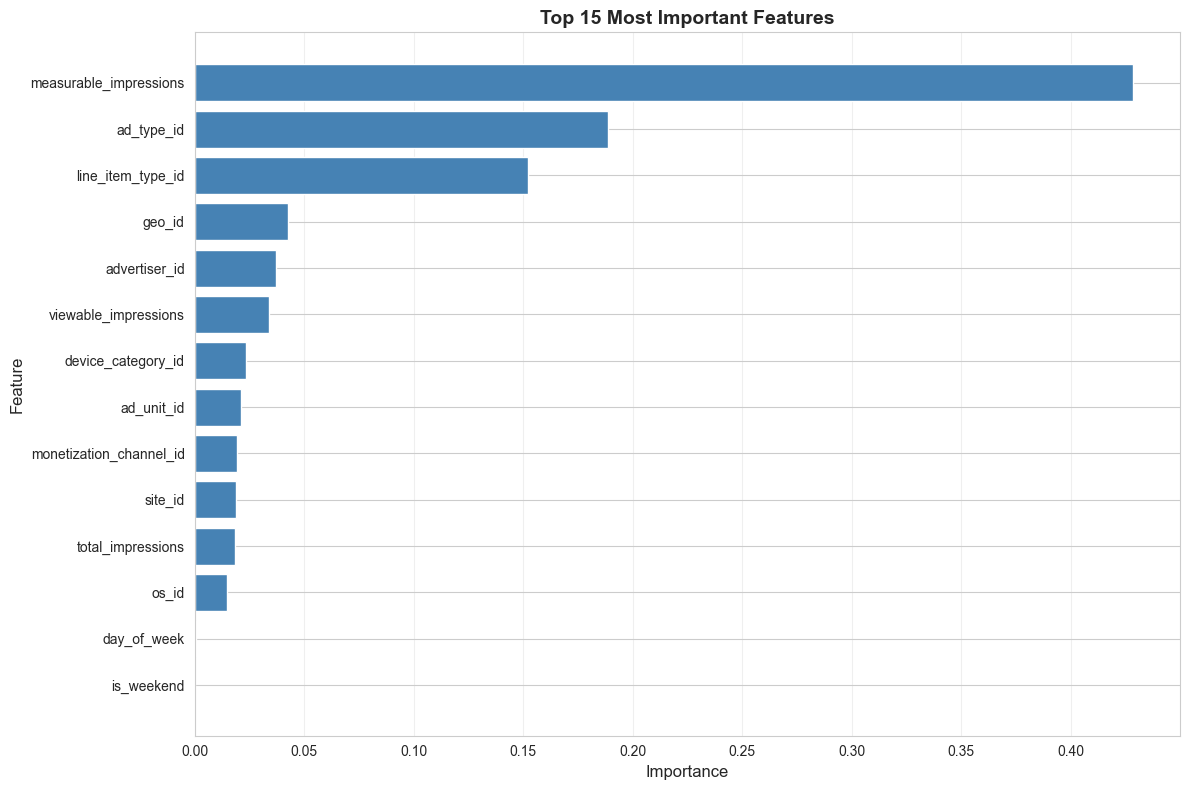


Top 10 Features:
  measurable_impressions: 0.4285
  ad_type_id: 0.1887
  line_item_type_id: 0.1521
  geo_id: 0.0425
  advertiser_id: 0.0373
  viewable_impressions: 0.0341
  device_category_id: 0.0235
  ad_unit_id: 0.0210
  monetization_channel_id: 0.0195
  site_id: 0.0187


In [58]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'].head(15), feature_importance['importance'].head(15), color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Features:")
for idx, row in feature_importance.head(10).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

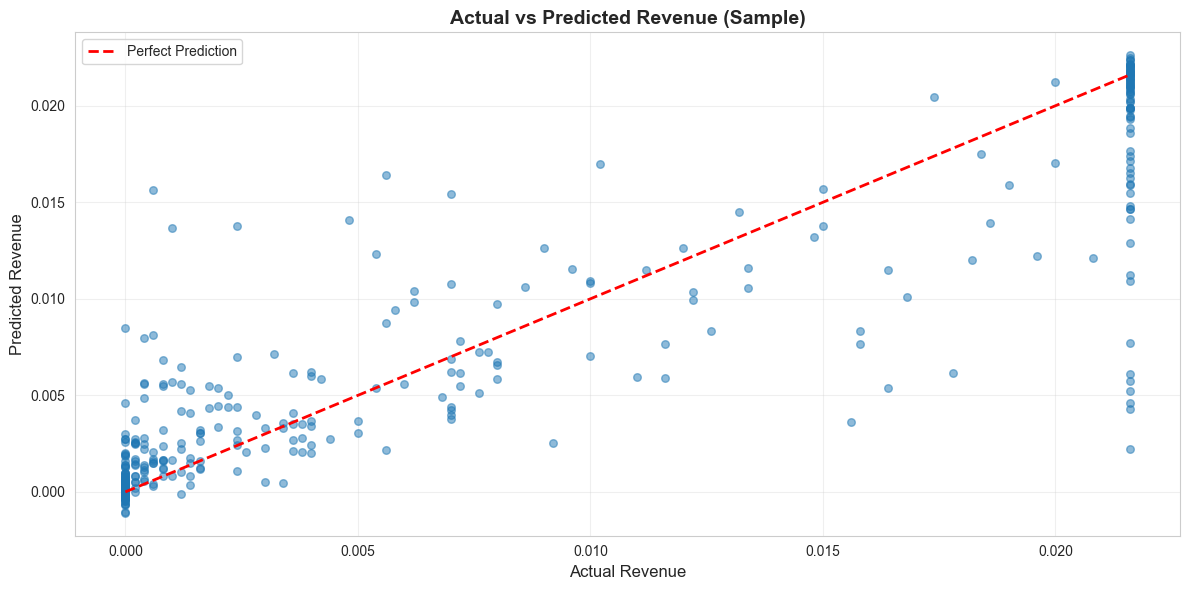

Sample Size: 500
R² Score on Sample: 0.8294


In [59]:
# Visualize predictions vs actual
sample_size = 500
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

plt.figure(figsize=(12, 6))
plt.scatter(y_test.iloc[sample_indices], y_test_pred[sample_indices], alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Revenue', fontsize=12)
plt.ylabel('Predicted Revenue', fontsize=12)
plt.title('Actual vs Predicted Revenue (Sample)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Sample Size: {sample_size}")
print(f"R² Score on Sample: {r2_score(y_test.iloc[sample_indices], y_test_pred[sample_indices]):.4f}")